In [6]:
import numpy as np
import json 
filedirectory="/Users/isabelleliu/Desktop/code practice/boston_house_prices.csv"
def load_data(filedirectory):
    data = np.genfromtxt(filedirectory, delimiter=',',skip_header=1)
    feature_names = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', \
                      'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
    feature_num = len(feature_names)

    #check data shape
    if data.shape[1]!=feature_num:
        data = data.reshape(data.shape[0]*data.shape[1] // feature_num, feature_num)

    #train and test ratio
    ratio = 0.8
    offset = int(data.shape[0] * ratio)
    training_data = data[:offset]

    # Normalization
    maximums, minimums = training_data.max(axis=0), \
                            training_data.min(axis=0)

    for i in range(feature_num):
        data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])

    #train and test ratio
    training_data = data[:offset]
    test_data = data[offset:]
    return training_data, test_data

training_data, test_data =load_data(filedirectory)
x = training_data[:, :-1]
y = training_data[:, -1:]

In [7]:
class Network(object):
    def __init__(self, num_of_weight):
        np.random.seed(0)
        self.w=np.random.randn(num_of_weight,1)
        self.b=0.
    def forward(self, x):
        z=np.dot(x,self.w)+self.b
        return z
    def loss(self,z,y):
        error=z-y
        cost=error**2
        cost=np.mean(cost)
        return cost

In [8]:
net = Network(13)
# 此处可以一次性计算多个样本的预测值和损失函数
x1 = x[0:3]
y1 = y[0:3]
z = net.forward(x1)
print('predict: ', z)
loss = net.loss(z, y1)
print('loss:', loss)

predict:  [[2.39362982]
 [2.46752393]
 [2.02483479]]
loss: 3.384496992612791


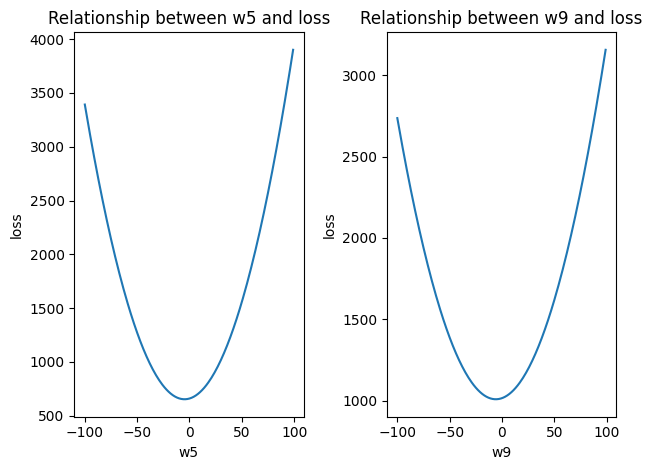

In [9]:
# only change w5 and w9

net= Network(13)

w5=np.arange(-100.0,100.0,1)
w9=np.arange(-100.0,100.0,1)
losses = np.zeros([len(w5), len(w9)])

for i in range(len(w5)):
    for j in range(len(w9)):
        net.w[5] = w5[i]
        net.w[9] = w9[j]
        z = net.forward(x)
        loss = net.loss(z, y)
        losses[i, j] = loss

import matplotlib.pyplot as plt
# Create the plot of w5 vs. loss
plt.subplot(1, 2, 1)
plt.plot(w5, losses.mean(axis=1))
plt.xlabel('w5')
plt.ylabel('loss')
plt.title('Relationship between w5 and loss')

# Create the plot of w9 vs. loss
plt.subplot(1, 2, 2)
plt.plot(w9, losses.mean(axis=0))
plt.xlabel('w9')
plt.ylabel('loss')
plt.title('Relationship between w9 and loss')

# Display the plots
plt.tight_layout()
plt.show()


#mean square leaves curve that can have differential coefficient

In [10]:
# L(w5',w9')<L(w5,w9)
#get gradient, get L differentiate w & b

x1 = x[0]
y1 = y[0]
z1 = net.forward(x1)
print('x1 {}, shape {}'.format(x1, x1.shape))
print('y1 {}, shape {}'.format(y1, y1.shape))
print('z1 {}, shape {}'.format(z1, z1.shape))

x1 [0.         0.18       0.07344184 0.         0.31481481 0.57750527
 0.64160659 0.26920314 0.         0.22755741 0.28723404 1.
 0.08967991], shape (13,)
y1 [0.42222222], shape (1,)
z1 [82.56578358], shape (1,)


In [11]:
gradient_w = (z1 - y1) * x1
print('gradient_w_by_sample1 {}, gradient.shape {}'.format(gradient_w, gradient_w.shape))

gradient_w_by_sample1 [ 0.         14.78584105  6.03277445  0.         25.86001006 47.43833952
 52.70385039 22.11330457  0.         18.69237618 23.5944272  82.14356136
  7.36662733], gradient.shape (13,)


In [12]:
# three samples, all w gradient
x3samples = x[0:3]
y3samples = y[0:3]
z3samples = net.forward(x3samples)

print('x {}, shape {}'.format(x3samples, x3samples.shape))
print('y {}, shape {}'.format(y3samples, y3samples.shape))
print('z {}, shape {}'.format(z3samples, z3samples.shape))

x [[0.00000000e+00 1.80000000e-01 7.34418420e-02 0.00000000e+00
  3.14814815e-01 5.77505269e-01 6.41606591e-01 2.69203139e-01
  0.00000000e+00 2.27557411e-01 2.87234043e-01 1.00000000e+00
  8.96799117e-02]
 [2.35922539e-04 0.00000000e+00 2.62405717e-01 0.00000000e+00
  1.72839506e-01 5.47997701e-01 7.82698249e-01 3.48961980e-01
  4.34782609e-02 1.14822547e-01 5.53191489e-01 1.00000000e+00
  2.04470199e-01]
 [2.35697744e-04 0.00000000e+00 2.62405717e-01 0.00000000e+00
  1.72839506e-01 6.94385898e-01 5.99382080e-01 3.48961980e-01
  4.34782609e-02 1.14822547e-01 5.53191489e-01 9.87519166e-01
  6.34657837e-02]], shape (3, 13)
y [[0.42222222]
 [0.36888889]
 [0.66      ]], shape (3, 1)
z [[82.56578358]
 [68.57512852]
 [82.76793283]], shape (3, 1)


In [13]:
gradient_w = (z3samples - y3samples) * x3samples
print('gradient_w {}, gradient.shape {}'.format(gradient_w, gradient_w.shape))

gradient_w [[0.00000000e+00 1.47858410e+01 6.03277445e+00 0.00000000e+00
  2.58600101e+01 4.74383395e+01 5.27038504e+01 2.21133046e+01
  0.00000000e+00 1.86923762e+01 2.35944272e+01 8.21435614e+01
  7.36662733e+00]
 [1.60913892e-02 0.00000000e+00 1.78977072e+01 0.00000000e+00
  1.17887328e+01 3.73768625e+01 5.33849043e+01 2.38013844e+01
  2.96548868e+00 7.83161415e+00 3.77311113e+01 6.82062396e+01
  1.39461434e+01]
 [1.93526545e-02 0.00000000e+00 2.15455909e+01 0.00000000e+00
  1.41914946e+01 5.70145906e+01 4.92140236e+01 2.86525468e+01
  3.56991012e+00 9.42784197e+00 4.54214096e+01 8.10831573e+01
  5.21104430e+00]], gradient.shape (3, 13)


In [14]:
#numpy: 
#一方面可以扩展参数的维度，代替for循环来计算1个样本对w0-w12 所有参数的梯度
#另一方面可以扩展样本的维度，代替for循环来计算样本0到样本403对参数的梯度
z = net.forward(x)
gradient_w = (z - y) * x
print('gradient_w shape {}'.format(gradient_w.shape))
print(gradient_w)

#上面gradient_w的每一行代表了一个样本对梯度的贡献。根据梯度的计算公式，总梯度是对每个样本对梯度贡献的平均值

gradient_w shape (404, 13)
[[0.00000000e+00 1.47858410e+01 6.03277445e+00 ... 2.35944272e+01
  8.21435614e+01 7.36662733e+00]
 [1.60913892e-02 0.00000000e+00 1.78977072e+01 ... 3.77311113e+01
  6.82062396e+01 1.39461434e+01]
 [1.93526545e-02 0.00000000e+00 2.15455909e+01 ... 4.54214096e+01
  8.10831573e+01 5.21104430e+00]
 ...
 [2.50588655e+01 0.00000000e+00 1.09716915e+02 ... 1.26674416e+02
  1.56676252e+02 8.03700749e+01]
 [1.69798991e+01 0.00000000e+00 1.10320835e+02 ... 1.27371677e+02
  1.47495021e+02 8.07689894e+01]
 [3.84468252e+01 0.00000000e+00 9.66057847e+01 ... 1.11536871e+02
  1.37953499e+02 6.86722162e+01]]


In [15]:
gradient_w = np.mean(gradient_w, axis=0)
print('gradient_w ', gradient_w.shape)
print('w ', net.w.shape)
print(gradient_w)
print(net.w)

gradient_w  (13,)
w  (13, 1)
[ 2.93784711 12.15321799 35.29219435  8.89366136 30.30833216 48.43539985
 59.87933447 22.70883234 28.65314268 37.61261437 52.75510702 84.99105499
 24.60235841]
[[ 1.76405235]
 [ 0.40015721]
 [ 0.97873798]
 [ 2.2408932 ]
 [ 1.86755799]
 [99.        ]
 [ 0.95008842]
 [-0.15135721]
 [-0.10321885]
 [99.        ]
 [ 0.14404357]
 [ 1.45427351]
 [ 0.76103773]]


In [16]:
gradient_w = gradient_w[:, np.newaxis]
print('gradient_w shape', gradient_w.shape)

gradient_w shape (13, 1)


In [17]:
z = net.forward(x)
gradient_w = (z - y) * x
gradient_w = np.mean(gradient_w, axis=0)
gradient_w = gradient_w[:, np.newaxis]
gradient_w

array([[ 2.93784711],
       [12.15321799],
       [35.29219435],
       [ 8.89366136],
       [30.30833216],
       [48.43539985],
       [59.87933447],
       [22.70883234],
       [28.65314268],
       [37.61261437],
       [52.75510702],
       [84.99105499],
       [24.60235841]])

In [18]:
gradient_b = (z - y)
gradient_b = np.mean(gradient_b)

In [19]:
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
        
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost
    
    def gradient(self,x,y):
        z=self.forward(x)
        gradient_w=(z-y)*x
        gradient_w=np.mean(gradient_w,axis=0)
        gradient_w=gradient_w[:,np.newaxis]
        gradient_b=(z-y)
        gradient_b=np.mean(gradient_b)

        return gradient_w, gradient_b

In [20]:
# 调用上面定义的gradient函数，计算梯度
# 初始化网络
net = Network(13)
# 设置[w5, w9] = [-100., -100.]
net.w[5] = -100.0
net.w[9] = -100.0

z = net.forward(x)
loss = net.loss(z, y)
gradient_w, gradient_b = net.gradient(x, y)
gradient_w5 = gradient_w[5][0]
gradient_w9 = gradient_w[9][0]
print('point {}, loss {}'.format([net.w[5][0], net.w[9][0]], loss))
print('gradient {}'.format([gradient_w5, gradient_w9]))

point [-100.0, -100.0], loss 7873.345739941161
gradient [-45.87968288123223, -35.50236884482904]


In [21]:
# 在[w5, w9]平面上，沿着梯度的反方向移动到下一个点P1
# 定义移动步长 eta(learning_rate)
eta = 0.1
# 更新参数w5和w9
#参数需要向梯度的反方向移动
net.w[5] = net.w[5] - eta * gradient_w5
net.w[9] = net.w[9] - eta * gradient_w9
# 重新计算z和loss
z = net.forward(x)
loss = net.loss(z, y)
gradient_w, gradient_b = net.gradient(x, y)
gradient_w5 = gradient_w[5][0]
gradient_w9 = gradient_w[9][0]
print('point {}, loss {}'.format([net.w[5][0], net.w[9][0]], loss))
print('gradient {}'.format([gradient_w5, gradient_w9]))

point [-95.41203171187678, -96.4497631155171], loss 7214.694816482369
gradient [-43.883932999069096, -34.019273908495926]


In [22]:
class Network(object):
    def __init__(self, num_of_weight):
        np.random.seed(0)
        self.w=np.random.randn(num_of_weight,1)
        self.w[5]=-10.
        self.w[9]=-10.
        self.b=0.

    def forward(self,x):
        z=np.dot(x,self.w)+self.b
        return z
    
    def loss(self,z,y):
        error=z-y
        num_samples=error.shape[0]
        cost=error*error
        cost=np.sum(cost)/num_samples
        return cost
    
    def gradient(self, x,y):
        z=self.forward(x)
        gradient_w=(z-y)*x
        gradient_w=np.mean(gradient_w,axis=0)
        gradient_w=gradient_w[:,np.newaxis]
        gradient_b=z-y
        gradient_b=np.mean(gradient_b)
        return gradient_w, gradient_b
    
    def update(self, gradient_w5, gradient_w9,eta=0.01):
        net.w[5]=net.w[5]-eta*gradient_w5
        net.w[9]=net.w[9]-eta*gradient_w9
    
    def train(self,x,y,iteration=100, eta=0.01):
        points=[]
        losses=[]
        for i in range(iteration):
            points.append([net.w[5][0],net.w[9][0]])
            z=self.forward(x)
            L=self.loss(z,y)
            gradient_w, gradient_b=self.gradient(x,y)
            gradient_w5=gradient_w[5][0]
            gradient_w9=gradient_w[9][0]
            self.update(gradient_w5,gradient_w9,eta)
            losses.append(L)
            if i%50==0:
                print('iter{},point{},loss{}'.format(i,[net.w[5][0],net.w[9][0]],L))
        return points,losses


iter0,point[-9.967753796617684, -9.97564708989489],loss39.56906320883074
iter50,point[-8.521140961753318, -8.880683536706238],loss26.26648284420455
iter100,point[-7.356336455525005, -7.994476748361786],loss17.60942480903642
iter150,point[-6.41878953244432, -7.276768295936178],loss11.975415881730045
iter200,point[-5.6644974921409466, -6.695079129385437],loss8.30865111318994
iter250,point[-5.057966474760835, -6.223205796550605],loss5.9220774011765895
iter300,point[-4.57056647333483, -5.840007365871439],loss4.3686020543501956
iter350,point[-4.17920435392768, -5.528426854775988],loss3.3572835048769276
iter400,point[-3.865253406962022, -5.274701829779721],loss2.6987935437181623
iter450,point[-3.6136898376278093, -5.06772760817968],loss2.2699276022281505
iter500,point[-3.4123961903167785, -4.89854356087384],loss1.990510291674826
iter550,point[-3.2515994357085622, -4.75991871879372],loss1.8083669889948044
iter600,point[-3.1234176877638755, -4.646017485913601],loss1.6895442930606506
iter650,po

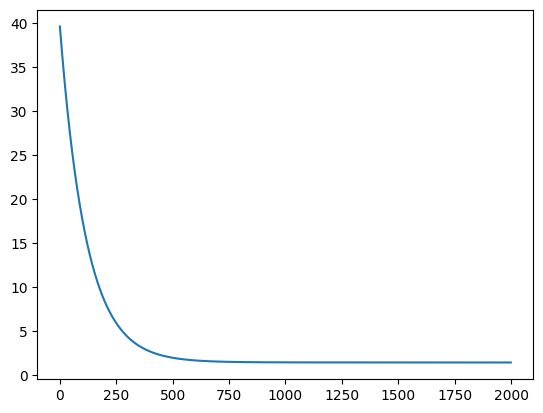

In [23]:
# 获取数据
train_data, test_data = load_data(filedirectory)
x = train_data[:, :-1]
y = train_data[:, -1:]
# 创建网络
net = Network(13)
num_iterations=2000
# 启动训练
points, losses = net.train(x, y, iteration=num_iterations, eta=0.01)

# 画出损失函数的变化趋势
plot_x = np.arange(num_iterations)
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

In [24]:
# apply to all w

class Network(object):
    def __init__(self,num_of_weight):
        np.random.seed(0)
        self.w=np.random.randn(num_of_weight,1)
        self.b=0.

    def forward(self,x):
        z=np.dot(x,self.w)+self.b
        return z
    
    def loss(self,y,z):
        error=z-y
        num_samples=error.shape[0]
        cost=error*error
        cost=np.sum(cost)/num_samples
        return cost
    
    def gradient(self,x,y):
        z=self.forward(x)
        gradient_w=(z-y)*x
        gradient_w=np.mean(gradient_w,axis=0)
        gradient_w=gradient_w[:,np.newaxis]
        gradient_b=z-y
        gradient_b=np.mean(gradient_b)
        return gradient_w, gradient_b
    
    def update(self, gradient_w, gradient_b,eta=0.01):
        self.w=self.w-eta*gradient_w
        self.b=self.b-eta*gradient_b

    def train(self, x,y,iterations=100,eta=0.01):
        losses=[]
        for i in range(iterations):
            z=self.forward(x)
            L=self.loss(y,z)
            gradient_w, gradient_b=self.gradient(x,y)
            self.update(gradient_w, gradient_b, eta)
            losses.append(L)

            if i%50==0:
                print("iter {}, Losses {}".format(i,L))
        return losses


iter 0, Losses 8.745954466634588
iter 50, Losses 1.2774697388163774
iter 100, Losses 0.8996702309578077
iter 150, Losses 0.7517595081577438
iter 200, Losses 0.639972629138626
iter 250, Losses 0.5520715543062924
iter 300, Losses 0.4823859335591014
iter 350, Losses 0.4267006173554156
iter 400, Losses 0.38180958457268527
iter 450, Losses 0.34527003891619995
iter 500, Losses 0.31521847389910035
iter 550, Losses 0.2902312865684321
iter 600, Losses 0.2692190880078799
iter 650, Losses 0.2513465505981326
iter 700, Losses 0.23597161032689729
iter 750, Losses 0.2225993398088164
iter 800, Losses 0.21084694223481504
iter 850, Losses 0.20041717616705224
iter 900, Losses 0.191078172525376
iter 950, Losses 0.1826480987330836
iter 1000, Losses 0.17498349903727212
iter 1050, Losses 0.1679704234620096
iter 1100, Losses 0.16151767264182426
iter 1150, Losses 0.1555516485510831
iter 1200, Losses 0.15001242449439559
iter 1250, Losses 0.1448507412035209
iter 1300, Losses 0.14002570673305992
iter 1350, Losses

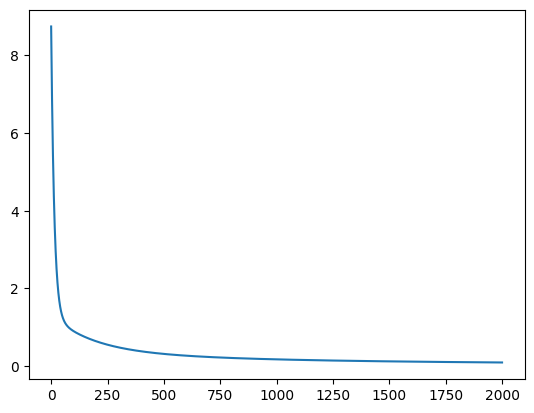

In [25]:
# 获取数据
train_data, test_data = load_data(filedirectory)
x = train_data[:, :-1]
y = train_data[:, -1:]
# 创建网络
net = Network(13)
num_iterations=2000
# 启动训练
losses = net.train(x, y, iterations=num_iterations, eta=0.01)

# 画出损失函数的变化趋势
plot_x = np.arange(num_iterations)
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

In [26]:
#stochastic gradient descent
# minibatch, batch size, Epoch

# 获取数据
train_data, test_data = load_data(filedirectory)
# random shuffle
np.random.shuffle(train_data)


#minibatch setting
batch_size=10
n=len(train_data)
mini_batches=[train_data[k:k+batch_size] for k in range(0,n,batch_size)]

net=Network(13)

for minibatch in mini_batches:
    x = minibatch[:, :-1]
    y = minibatch[:, -1:]
    loss = net.train(x,y,iterations =1)

iter 0, Losses 9.946450707104102
iter 0, Losses 3.710141454098134
iter 0, Losses 8.900971341357172
iter 0, Losses 10.302473036750808
iter 0, Losses 9.079455803350537
iter 0, Losses 8.804273656633594
iter 0, Losses 9.198792174424685
iter 0, Losses 8.080998388087028
iter 0, Losses 5.765144110325261
iter 0, Losses 4.5771775534957655
iter 0, Losses 2.2217896373134973
iter 0, Losses 3.614778432864825
iter 0, Losses 1.9190476437980575
iter 0, Losses 4.358638060844266
iter 0, Losses 4.624079740459651
iter 0, Losses 6.0631300392313685
iter 0, Losses 3.913534425985874
iter 0, Losses 4.4287789475408434
iter 0, Losses 2.097014153164939
iter 0, Losses 1.345035767002666
iter 0, Losses 1.21127241084567
iter 0, Losses 2.3266951474032345
iter 0, Losses 2.4518210952957924
iter 0, Losses 3.4009115251918396
iter 0, Losses 2.7058868527145257
iter 0, Losses 0.2596265457912877
iter 0, Losses 1.3357956532173223
iter 0, Losses 3.16569834103214
iter 0, Losses 1.1949026980085975
iter 0, Losses 1.922303633068693

In [27]:
# add epoch train to the original network
class Network(object):
    def __init__(self,num_of_weight):
        #np.random.seed(0)
        self.w=np.random.randn(num_of_weight,1)
        self.b=0.
    
    def forward(self,x):
        z=np.dot(x,self.w)+self.b
        return z
    
    def loss(self,z,y):
        error=z-y
        num_samples=error.shape[1]
        cost=error*error
        cost=np.sum(cost)/num_samples
        return cost
    
    def gradient(self,x,y):
        z=self.forward(x)
        N=x.shape[0]
        gradient_w=1/N*np.sum((z-y)*x,axis=0)
        gradient_w=gradient_w[:,np.newaxis]
        gradient_b=1/n*np.sum(z-y)
        return gradient_w, gradient_b
    
    def update(self, gradient_w, gradient_b,eta=0.01):
        self.w=self.w-eta*gradient_w
        self.b=self.b-eta*gradient_b

    def train(self, training_data, num_epoches, batch_size=10, eta=0.01):
        n=len(training_data)
        losses=[]
        for epoch in range(num_epoches):
            # 在每轮迭代开始之前，将训练数据的顺序随机打乱
            # 然后再按每次取batch_size条数据的方式取出
            np.random.shuffle(training_data)
            mini_batches=[training_data[k:k+batch_size] for k in range(0,n,batch_size)]
            for iter, minibatch in enumerate(mini_batches):
                x = minibatch[:, :-1]
                y = minibatch[:, -1:]
                z_ = self.forward(x)
                loss_ = self.loss(z_,y)
                gradient_w_, gradient_b_=self.gradient(x,y)
                self.update(gradient_w_, gradient_b_,eta)
                losses.append(loss_)
                print('Epoch {:3d}/ iter {:3d}, loss = {:.4f}'.format(epoch, iter, loss_))
        return losses

### Gradient almost 0
If the gradient of some parameters in a machine learning model is almost equal to 0, it means that changing those parameters will not significantly affect the output of the model.

In other words, the model is already close to optimal with respect to those parameters, and further updates to those parameters will not result in significant improvements in the model's performance.

This can happen when the model has already converged to a good solution, or when some of the parameters are not very important for the problem at hand. In some cases, it may be possible to remove or fix those parameters without significantly affecting the model's performance.

It is important to note that the gradient being close to 0 does not necessarily mean that the parameter has converged to its optimal value, as there may be other factors affecting the behavior of the model. In general, it is important to monitor the behavior of the model and the changes in the loss function over time to ensure that the model is learning effectively.

### Batch size
The batch size is a hyperparameter that determines the number of samples used in each update of the weights during stochastic gradient descent (SGD). It is typically set to a value between 1 and the size of the training set, and the optimal value may depend on the specific problem and dataset.

If the batch size is too small, the weights may be updated too frequently, leading to more updates and potentially faster convergence. However, this can also make the updates more noisy, as the gradient estimates may be less accurate with fewer samples. This can lead to slower convergence or oscillations in the loss function.

If the batch size is too large, the updates may be less noisy, as the gradient estimates will be more accurate with more samples. However, this can also slow down the convergence, as the weights are updated less frequently and may take longer to converge to the optimal values. Additionally, larger batch sizes can require more memory and computation, which can be a practical limitation for some systems.

In general, a reasonable starting point for the batch size is often between 32 and 256, but it is recommended to experiment with different batch sizes and monitor the performance of the model over time to find the optimal value for a particular problem and dataset.

In [73]:
import torch

class Network(torch.nn.Module):
    def __init__(self, num_of_weight):
        # Define the neural network architecture
        super(Network,self).__init__()
        self.linear=torch.nn.Linear(num_of_weight,1)

    def forward(self,x):
        return self.linear(x)
    
    def loss(self,z,y):
        #mean standard loss(for loss)
        criterion=torch.nn.MSELoss()
        return criterion(z, y)
    
    def train_model(self, training_data, num_epochs, batch_size=10, learning_rate=0.01):
        n = len(training_data)
        #stochastic gradient descent

        optimizer = torch.optim.SGD(self.parameters(), lr=learning_rate)

        losses = []
        for epoch in range(num_epochs):
            np.random.shuffle(training_data)
            mini_batches = [training_data[k:k+batch_size] for k in range(0, n, batch_size)]
            for iter, minibatch in enumerate(mini_batches):
                # Convert the data to PyTorch tensors
                x = torch.from_numpy(minibatch[:, :-1]).float()
                y = torch.from_numpy(minibatch[:, -1:]).float()
                # Reset the gradients and compute the forward pass
                optimizer.zero_grad()
                z_ = self.forward(x)
                # Compute the loss and gradients, and update the weights
                loss_ = self.loss(z_, y)
                # 反向传播，计算每层参数的梯度值
                loss_.backward()
                ##更新参数，根据设置好的学习率迭代一步
                optimizer.step()
                losses.append(loss_.item())
                print('Epoch {:3d}/ iter {:3d}, loss = {:.4f}'.format(epoch, iter, loss_.item()))
        return losses
    
    def eval_model(self, test_data):
        # Set the model to evaluation mode
        self.eval()
        # Convert the test data to PyTorch tensor
        x_test = torch.from_numpy(test_data[:, :-1]).float()
        # Make predictions on the test data
        with torch.no_grad():
            y_pred = self.forward(x_test).numpy()
        return y_pred.flatten()

* Optimizer: In PyTorch, an optimizer is an object that performs the optimization algorithm on the parameters of a neural network. It takes the gradients of the loss function with respect to the parameters, and uses them to update the parameters in the direction that minimizes the loss.

* optimizer.zero_grad(): This method is used to reset the gradients of the parameters before computing new gradients. This is necessary because PyTorch accumulates gradients by default, which can lead to incorrect results if not cleared between iterations.

* optimizer.step(): This method updates the parameters of the neural network based on the computed gradients and the chosen optimization algorithm. It typically involves multiplying the gradients by a learning rate and subtracting the result from the current parameter values.

* loss_.backward(): This method computes the gradients of the loss function with respect to the parameters of the neural network, using the chain rule of calculus. It is necessary to call this method before calling optimizer.step(), because the optimizer needs the gradients to update the parameters.

* In the original code, the update method is used to manually update the parameters of the network based on the gradients. This is not necessary when using an optimizer in PyTorch, because the optimizer handles the parameter updates automatically.

Epoch   0/ iter   0, loss = 0.4263
Epoch   0/ iter   1, loss = 0.1511
Epoch   0/ iter   2, loss = 0.0919
Epoch   0/ iter   3, loss = 0.0802
Epoch   0/ iter   4, loss = 0.0724
Epoch   0/ iter   5, loss = 0.1249
Epoch   0/ iter   6, loss = 0.0796
Epoch   0/ iter   7, loss = 0.0627
Epoch   0/ iter   8, loss = 0.0378
Epoch   1/ iter   0, loss = 0.0831
Epoch   1/ iter   1, loss = 0.0568
Epoch   1/ iter   2, loss = 0.0641
Epoch   1/ iter   3, loss = 0.0624
Epoch   1/ iter   4, loss = 0.0573
Epoch   1/ iter   5, loss = 0.0546
Epoch   1/ iter   6, loss = 0.0466
Epoch   1/ iter   7, loss = 0.0495
Epoch   1/ iter   8, loss = 0.0054
Epoch   2/ iter   0, loss = 0.0628
Epoch   2/ iter   1, loss = 0.0401
Epoch   2/ iter   2, loss = 0.0430
Epoch   2/ iter   3, loss = 0.0539
Epoch   2/ iter   4, loss = 0.0428
Epoch   2/ iter   5, loss = 0.0291
Epoch   2/ iter   6, loss = 0.0483
Epoch   2/ iter   7, loss = 0.0430
Epoch   2/ iter   8, loss = 0.0135
Epoch   3/ iter   0, loss = 0.0398
Epoch   3/ iter   1,

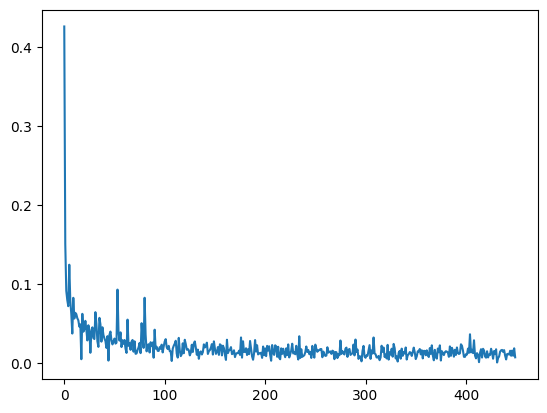

In [74]:
# 获取数据
train_data, test_data = load_data(filedirectory)
# random shuffle
net=Network(13)

losses=net.train_model(train_data, num_epochs=50,batch_size=50,learning_rate=0.1)

plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

In [90]:
class Regressor(torch.nn.Module):
    def __init__(self):
        super(Regressor,self).__init__()
        #
        self.linear=torch.nn.Linear(13,1)

    def forward(self,x):
        return self.linear(x)


In [96]:
model=Regressor()
model.train()
optimizer=torch.optim.SGD(model.parameters(), lr=0.01)
EPOCH_NUM = 50   # 设置外层循环次数
BATCH_SIZE = 50  # 设置batch大小

for epoch in range(EPOCH_NUM):
    np.random.shuffle(training_data)
    mini_batches=[training_data[k:k+BATCH_SIZE] for k in range(0,len(training_data), BATCH_SIZE)]
    for iter, minibatch in enumerate(mini_batches):
        x = torch.from_numpy(minibatch[:, :-1]).float()
        y = torch.from_numpy(minibatch[:, -1:]).float()
        predicts = model(x)
        loss=torch.nn.functional.mse_loss(predicts,y)
        avg_loss=torch.mean(loss)
        if iter%5==0:
            print('Epoch: {},iter: {}, loss is: {}'.format(epoch,iter,avg_loss))
        # reverse, gradient of each layer's parameter
        avg_loss.backward()
        #update parameters(in optimizer)
        optimizer.step()
        #empty optimizer
        optimizer.zero_grad()
        

Epoch: 0,iter: 0, loss is: 0.12729346752166748
Epoch: 0,iter: 5, loss is: 0.1300516277551651
Epoch: 1,iter: 0, loss is: 0.11222032457590103
Epoch: 1,iter: 5, loss is: 0.1391133964061737
Epoch: 2,iter: 0, loss is: 0.10335563868284225
Epoch: 2,iter: 5, loss is: 0.06684283912181854
Epoch: 3,iter: 0, loss is: 0.07777070999145508
Epoch: 3,iter: 5, loss is: 0.12548166513442993
Epoch: 4,iter: 0, loss is: 0.11220381408929825
Epoch: 4,iter: 5, loss is: 0.09741351753473282
Epoch: 5,iter: 0, loss is: 0.10818776488304138
Epoch: 5,iter: 5, loss is: 0.0912729799747467
Epoch: 6,iter: 0, loss is: 0.11255474388599396
Epoch: 6,iter: 5, loss is: 0.07801833748817444
Epoch: 7,iter: 0, loss is: 0.09216226637363434
Epoch: 7,iter: 5, loss is: 0.07397449016571045
Epoch: 8,iter: 0, loss is: 0.07782319188117981
Epoch: 8,iter: 5, loss is: 0.06904488801956177
Epoch: 9,iter: 0, loss is: 0.10553277283906937
Epoch: 9,iter: 5, loss is: 0.07461318373680115
Epoch: 10,iter: 0, loss is: 0.06976313143968582
Epoch: 10,iter:

* torch.nn.MSELoss is a class that inherits from torch.nn.Module, which means it can be instantiated as an object and its parameters can be learned during training
* torch.nn.functional.mse_loss is a simple function that takes inputs and returns the loss value without any internal state.

In [97]:
#save model
torch.save(model.state_dict(),"regressors.pth")

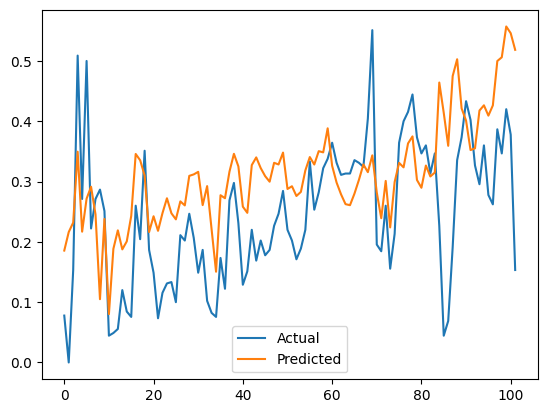

In [98]:
model_dict=torch.load("regressors.pth")
model.load_state_dict(model_dict)
model.eval()

# Convert the test data to PyTorch tensor
x_test = torch.from_numpy(test_data[:, :-1]).float()
y_test=torch.from_numpy(test_data[:, -1:]).float()
# Make predictions on the test data
y_pred = model(x_test)
# Plot the actual and predicted values
plt.plot(test_data[:, -1:], label='Actual')
plt.plot(y_pred.detach().numpy(), label='Predicted')
plt.legend()
plt.show()